# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "video/hot_rod.mp4"

## Task 1: Define generator for reading video

In [3]:
video = cv2.VideoCapture(VFILE)

ret, frame = video.read()

print(frame.shape)
print(f"ret: {ret}")

cv2.imshow("frame", frame)

cv2.waitKey(0) 
cv2.destroyAllWindows()  # Llama a la función correctamente
cv2.waitKey(1)  # Asegúrate de que se procesen los eventos de la GUI
video.release()


(480, 640, 3)
ret: True


In [4]:
def ejegenerador():
    for i in range(10):
        yield i*i
        
for v in ejegenerador():
    print(v)

0
1
4
9
16
25
36
49
64
81


In [5]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
        
    video.release()
    yield None

## Task 2: Retrieve and display video frames

In [6]:
for f in get_frames(VFILE):
    if f is None:
        break
    cv2.imshow("frame", f)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()
cv2.waitKey(1)



-1

## Task 2: Define function to get a single video frame

In [7]:
# Completar la función para obtener un fotograma específico por índice
def get_frame(filename,index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
            break
        
    video.release()
    return None

## Task 2: Examining pixels

In [8]:
frame = get_frame(VFILE,80)
print(f'Shape: {frame.shape}')
print(f'Pixel at (0,0): {frame[0,0,:]}') # BGR -> RGB
print(f'Pixel at (150,75): {frame[150,75,:]}')


Shape: (480, 640, 3)
Pixel at (0,0): [47 19  0]
Pixel at (150,75): [150 127  86]


## Task 2: Displaying a video frame

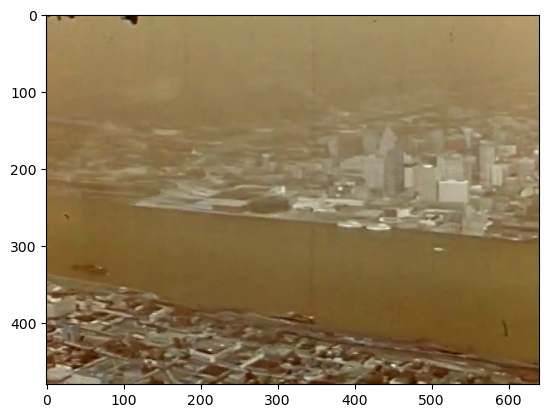

In [9]:
plt.imshow(frame)

## Task 3: Fixing color convention

Pixel at (0,0): [47 19  0]
Pixel at (0,0): [ 0 19 47]


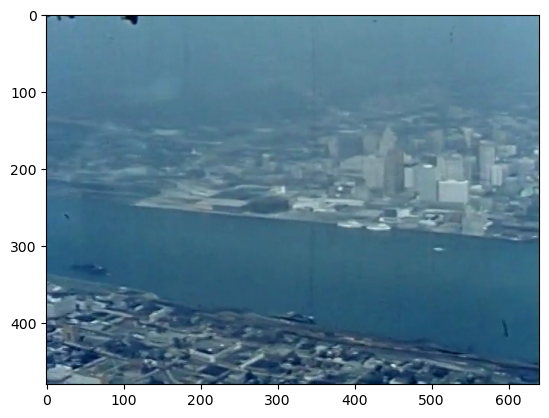

In [10]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print(f'Pixel at (0,0): {frame[0,0,:]}') # BGR -> RGB
print(f'Pixel at (0,0): {fix_frame[0,0,:]}') 
plt.imshow(fix_frame)
#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Task 3: Cropping a video frame

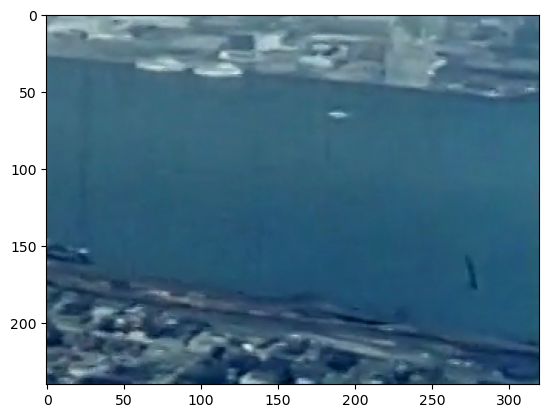

In [11]:
plt.imshow(fix_frame[240:480, 320:640])

## Task 3: Adjusting Brightness

(min max) (0.0, 127.5 ) float64
(min max) (0, 127 ) uint8


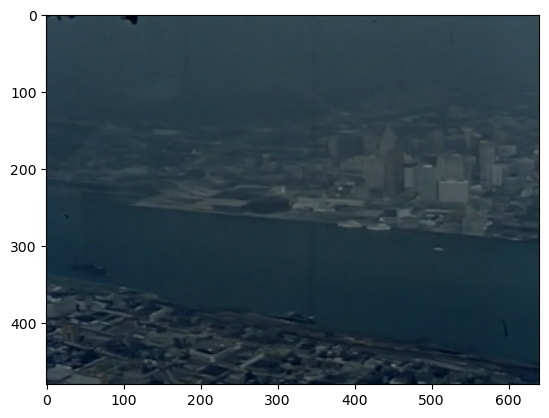

In [12]:
darker = 0.5 * fix_frame
print(f'(min max) ({darker.min()}, {darker.max()} ) {darker.dtype}')
darker = darker.astype(np.uint8)
print(f'(min max) ({darker.min()}, {darker.max()} ) {darker.dtype}')
plt.imshow(darker)

## Task 4: Drawing a circle

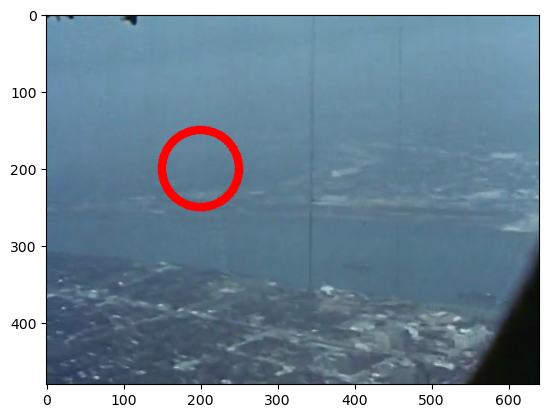

In [13]:
frame = get_frame(VFILE, 200)
cv2.circle(frame, 
           center = (200, 200),
           radius= 50,
           color= (0, 0, 255), 
           thickness=10
           )
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fix_frame)

## Task 4: Processing an entire video

In [14]:
counter = 0
for frame in get_frames(VFILE):
    if frame is None: 
        break
    cv2.putText(frame,
                text = str(counter),
                org = (100, 100),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 1,
                color = (0, 255, 0), #  BGR
                thickness=3
    )
    cv2.imshow("frame", frame)
    if cv2.waitKey(10) == 27:
        break
    counter += 1

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
# Agrega un circulo verde al rededor del texto anterior


## Task 5: Generating a new video file

In [ ]:
#fourcc = cv2.VideoWriter_fourcc('M', 'P','4','V')
fourcc = cv2.VideoWriter_fourcc('m', 'p','4','v')
video_out = cv2.VideoWriter("output.mp4", fourcc, 20, (640, 480))

counter = 0
for frame in get_frames(VFILE):
    if frame is None: 
        break
    cv2.putText(frame,
                text = str(counter),
                org = (100, 100),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 1,
                color = (0, 255, 0), #  BGR
                thickness=3
    )
    
    video_out.write(frame)
    counter += 1

video_out.release()


: 

In [22]:
counter

3597

## Task 5: Finding the total frame count

In [15]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print(f'Frame count: {count}')

Frame count: 3597


## Task 6: Creating a collage

Skip frames: 239


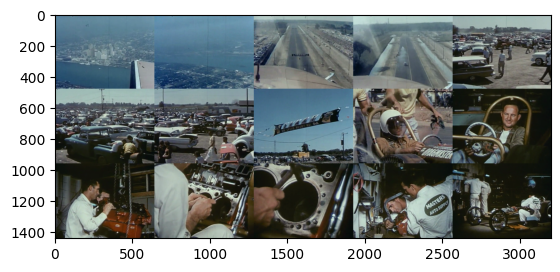

In [ ]:
skip_frames = count // 15
print(f'Skip frames: {skip_frames}')

